In [ ]:
import pandas as pd
import ast
import numpy as np


In [ ]:
All=pd.read_csv("/content/drive/MyDrive/Drug_recommendation_Alzimer/articles_scispacy.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
All.head()

,Unnamed: 0,Unnamed: 0.1,pubmed_id,title,abstract,doi,publication_date,authors,year_published,Title_abstract,RCT,label,prediction,true_label,scispacy_drugs,scispacy_disease
0,0,0,36375694,Characterisation of C101248: A novel selective...,"Neuroinflammation, specifically the NLRP3 infl...",10.1016/j.neuropharm.2022.109330,2022-11-15,"[{'lastname': 'Ossola', 'firstname': 'Bernardi...",2022,Characterisation of C101248: A novel selective...,no,0,0,0,['K'],"['Neuroinflammation', 'neurodegenerative', 'di..."
1,1,1,36375591,Risk of subsequent dementia or Alzheimer's dis...,"Alzheimer's disease (AD), a common form of dem...",10.1016/j.ajo.2022.11.005,2022-11-15,"[{'lastname': 'Tsai', 'firstname': 'Hou-Ren', ...",2022,Risk of subsequent dementia or Alzheimer's dis...,no,0,0,0,[],"['Alzheimer', ""'s"", 'disease', 'dementia', 'ag..."
2,2,2,36374494,Brain Aging Among Racially and Ethnically Dive...,Neuroimaging studies have documented racial an...,10.1001/jamaneurol.2022.3919,2022-11-15,"[{'lastname': 'Turney', 'firstname': 'Indira C...",2022,Brain Aging Among Racially and Ethnically Dive...,no,0,0,0,[],"['cerebrovascular', 'disease', 'neurodegenerat..."
3,3,3,36374001,Revisiting the involvement of tau in complex n...,Tau ablation has a protective effect in epilep...,10.1088/1741-2552/aca261,2022-11-15,"[{'lastname': 'Bouillet', 'firstname': 'Thomas...",2022,Revisiting the involvement of tau in complex n...,no,0,0,0,['Tau'],"['epilepsy', 'Alzheimer', ""'s"", 'disease', 'ep..."
4,4,4,36373976,Role of Calcium Dysregulation in Alzheimer's D...,The increasing incidence of Alzheimer's Diseas...,10.1111/cbdd.14175,2022-11-15,"[{'lastname': 'Joshi', 'firstname': 'Maithili'...",2022,Role of Calcium Dysregulation in Alzheimer's D...,no,0,0,0,"['Calcium', 'Ca']","['Alzheimer', ""'s"", 'Disease']"


In [ ]:
All.shape

(17611, 16)

In [ ]:
All['primary_drug']=None
All['primary_disease']=None
All = All[All['scispacy_drugs'] != '[]']
All = All[All['scispacy_disease'] != '[]']
All.reset_index(inplace = True,drop=True)
All.shape

(11509, 18)

In [ ]:
for index, row in All.iterrows():
    row["scispacy_drugs"] = ast.literal_eval(row["scispacy_drugs"])
    pd = max(set(row["scispacy_drugs"]), key = row["scispacy_drugs"].count)
    All['primary_drug'].iloc[index]=pd
    row["scispacy_disease"] = ast.literal_eval(row["scispacy_disease"])
    primary_dis = max(set(row["scispacy_disease"]), key = row["scispacy_disease"].count)
    All['primary_disease'].iloc[index]=primary_dis

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
All.head()

,Unnamed: 0,Unnamed: 0.1,pubmed_id,title,abstract,doi,publication_date,authors,year_published,Title_abstract,RCT,label,prediction,true_label,scispacy_drugs,scispacy_disease,primary_drug,primary_disease
0,0,0,36375694,Characterisation of C101248: A novel selective...,"Neuroinflammation, specifically the NLRP3 infl...",10.1016/j.neuropharm.2022.109330,2022-11-15,"[{'lastname': 'Ossola', 'firstname': 'Bernardi...",2022,Characterisation of C101248: A novel selective...,no,0,0,0,['K'],"['Neuroinflammation', 'neurodegenerative', 'di...",K,Neuroinflammation
1,3,3,36374001,Revisiting the involvement of tau in complex n...,Tau ablation has a protective effect in epilep...,10.1088/1741-2552/aca261,2022-11-15,"[{'lastname': 'Bouillet', 'firstname': 'Thomas...",2022,Revisiting the involvement of tau in complex n...,no,0,0,0,['Tau'],"['epilepsy', 'Alzheimer', ""'s"", 'disease', 'ep...",Tau,epilepsy
2,4,4,36373976,Role of Calcium Dysregulation in Alzheimer's D...,The increasing incidence of Alzheimer's Diseas...,10.1111/cbdd.14175,2022-11-15,"[{'lastname': 'Joshi', 'firstname': 'Maithili'...",2022,Role of Calcium Dysregulation in Alzheimer's D...,no,0,0,0,"['Calcium', 'Ca']","['Alzheimer', ""'s"", 'Disease']",Ca,'s
3,5,5,36373666,Shapeshifting tau: from intrinsically disorder...,Tau is an intrinsically disordered protein tha...,10.1042/EBC20220150,2022-11-15,"[{'lastname': 'Mengham', 'firstname': 'Kurtis'...",2022,Shapeshifting tau: from intrinsically disorder...,no,0,0,0,"['Tau', 'tubulin', 'Tau', 'liquid-liquid']","['Alzheimer', ""'s"", 'disease', 'tauopathies', ...",Tau,disease
4,6,6,36373344,A public resource of baseline data from the Al...,The Alzheimer's Prevention Initiative Autosoma...,10.1002/alz.12843,2022-11-15,"[{'lastname': 'Reiman', 'firstname': 'Eric M',...",2022,A public resource of baseline data from the Al...,yes,1,1,1,"['amyloid', 'beta', '(', 'Aβ', ')', 'presenili...","['Alzheimer', ""'s"", 'Prevention', 'Autosomal-D...",),Alzheimer


In [ ]:
All['primary_drug'].value_counts()

Aβ           315
Tau          301
amyloid      264
(            214
±            213
            ... 
Aqueously      1
TAN            1
FAIM-L         1
ADASJcog       1
proBDNF        1
Name: primary_drug, Length: 4422, dtype: int64

In [ ]:
All['primary_disease'].value_counts()

disease       2894
dementia       882
AD             690
Alzheimer      441
MCI            398
              ... 
cleft            1
metal            1
cognition        1
psychotic        1
spike-wave       1
Name: primary_disease, Length: 1035, dtype: int64

## Primary disease may not be of much use as the count of keywords like disease, low, protien has max count hence articles unrelated to alzheimer's cannot be determined by count

In [ ]:
Alzheimer_search=["Alzheimer","AD","Alzheimer dementia","Alzheimer dementia(AD)","Alzheimer sclerosis","Alzheimer syndrome","Alzheimer's disease","Alzheimer-type dementia (ATD)","DAT","Familial Alzheimer disease","FAD","Presenile and senile dementia", "Primary senile degenerative dementia" ,"SDAT"]
Alzheimer_search=list(map(str.lower,Alzheimer_search))


In [ ]:
# Checking if alzheimer's disease is recognized by scipacy
All['Alzheimer_found']=False
for index, row in All.iterrows():
    row["scispacy_disease"] = ast.literal_eval(row["scispacy_disease"])
    row["scispacy_disease"]=list(map(str.lower,row["scispacy_disease"]))
    All['Alzheimer_found'].iloc[index]=any(item in Alzheimer_search for item in row["scispacy_disease"])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
All['Alzheimer_found'].value_counts()

True     10409
False     1100
Name: Alzheimer_found, dtype: int64

In [ ]:
All.to_excel("/content/drive/MyDrive/Drug_recommendation_Alzimer/primary_drug_disease.xlsx")

#Checking for 

In [ ]:
import pandas as pd

In [ ]:
All=pd.read_excel("/content/drive/MyDrive/Drug_recommendation_Alzimer/primary_drug_disease_treatment.xlsx")

In [ ]:

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Dense,LSTM,Dropout,Flatten,BatchNormalization,Conv1D,GlobalMaxPooling1D,MaxPooling1D
from keras.optimizers import  SGD
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing import sequence
from keras.utils.np_utils import to_categorical
from keras import regularizers
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt

import os

In [ ]:
All['Treatment'].value_counts()

no     1104
yes     249
Name: Treatment, dtype: int64

In [ ]:
df2 = All[~All['Treatment'].isnull()]
df2['label_lstm'] = df2['Treatment'].map({'yes':0, 'no':1})
df2['label_lstm'].value_counts()

<ipython-input-12-b70e0675128a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label_lstm'] = df2['Treatment'].map({'yes':0, 'no':1})


1    1104
0     249
Name: label_lstm, dtype: int64

In [ ]:
"""
treat=df2[df2['label_lstm']==0]
nontreat=df2[df2['label_lstm']!=0]
nontreat=nontreat.sample(n=treat.shape[0])
df=pd.concat([treat, nontreat])
"""

"\ntreat=df2[df2['label_lstm']==0]\nnontreat=df2[df2['label_lstm']!=0]\nnontreat=nontreat.sample(n=treat.shape[0])\ndf=pd.concat([treat, nontreat])\n"

In [ ]:
X=df2['abstract']
Y=df2['label_lstm']

In [ ]:
def clean_text(txt):
    txt = "".join(v for v in txt if v not in string.punctuation.lower())
    return txt
X=[clean_text(i) for i in X]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

def get_sequence_of_tokens(corpus):
    ## tokenization
    
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        input_sequences.append(token_list)
    return input_sequences, total_words

inp_sequences, total_words = get_sequence_of_tokens(X)

In [ ]:
def get_sequence_of_tokens_pred(corpus):
    ## tokenization
    
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    #input_sequences = []
    token_list = tokenizer.texts_to_sequences([corpus])[0]
    return token_list, total_words

In [ ]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='post'))
   
    predictors = input_sequences[:,:-1]
    return predictors, max_sequence_len

predictors, max_sequence_len = generate_padded_sequences(inp_sequences)

In [ ]:
def generate_padded_sequences_pred(input_sequences,max_sequence_len):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='post'))
   
    predictors = input_sequences[:,:-1]
    print(predictors)
    return predictors, max_sequence_len

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(predictors,Y, test_size=0.10, random_state=42)
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
def build_model():

  opt = Adam(lr=0.01)

  model = Sequential()
  model.add(Embedding(total_words, 16, input_length=x_train.shape[1], mask_zero=True))
  model.add(LSTM(12, dropout=0.7, recurrent_dropout=0.7))
  model.add(Dense(6, kernel_regularizer=regularizers.l1_l2(0.3)))
  model.add(Dropout(0.9))
  model.add(Dense(2, activation='softmax'))
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

model_lstm=build_model()

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 757, 16)           344960    
                                                                 
 lstm (LSTM)                 (None, 12)                1392      
                                                                 
 dense (Dense)               (None, 6)                 78        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 2)                 14        
                                                                 
Total params: 346,444
Trainable params: 346,444
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min',patience=5)
history_lstm = model_lstm.fit(x_train, y_train, epochs=20,batch_size=300,validation_data=(x_test,y_test),shuffle=False)

Epoch 1/20
5/5 [==============================] - 24s 4s/step - loss: 6.6339 - accuracy: 0.7067 - val_loss: 5.8555 - val_accuracy: 0.8162
Epoch 2/20
5/5 [==============================] - 21s 4s/step - loss: 5.5938 - accuracy: 0.8159 - val_loss: 4.8588 - val_accuracy: 0.8162
Epoch 3/20
5/5 [==============================] - 18s 4s/step - loss: 4.6362 - accuracy: 0.8159 - val_loss: 3.9844 - val_accuracy: 0.8162
Epoch 4/20
5/5 [==============================] - 17s 3s/step - loss: 3.8243 - accuracy: 0.8151 - val_loss: 3.2237 - val_accuracy: 0.8162
Epoch 5/20
5/5 [==============================] - 19s 4s/step - loss: 3.0664 - accuracy: 0.8159 - val_loss: 2.5597 - val_accuracy: 0.8162
Epoch 6/20
5/5 [==============================] - 19s 4s/step - loss: 2.4224 - accuracy: 0.8176 - val_loss: 1.9686 - val_accuracy: 0.8162
Epoch 7/20
5/5 [==============================] - 17s 3s/step - loss: 1.8772 - accuracy: 0.8159 - val_loss: 1.5082 - val_accuracy: 0.8162
Epoch 8/20
5/5 [==================

In [ ]:
max_words = 100
max_len = 757
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(All["abstract"])
sequences = tok.texts_to_sequences(All["abstract"])
txts = pad_sequences(sequences, maxlen=max_len, padding='post')

In [ ]:
preds = model_lstm.predict(txts)
len(sequences)

360/360 [==============================] - 78s 215ms/step


11509

In [ ]:
predictions=[ 1 if i<j else 0 for i,j in preds  ] 
All['Treatment_mentioned']=predictions

#We will now idetify the top 10 drugnames based on the following details:
* We will filter articles in which Alzheimer disease is mentioned in abstract, article mentiones clinical trial and therapeutic association with drugname
*Now, we will check the drugnames which has maximum frequencies as primary drug

In [ ]:
All.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,pubmed_id,title,abstract,Treatment,doi,publication_date,authors,...,label,prediction,true_label,scispacy_drugs,scispacy_disease,primary_drug,primary_disease,Alzheimer_found,Treatment.1,Treatment_mentioned
0,0,0,0,36375694,Characterisation of C101248: A novel selective...,"Neuroinflammation, specifically the NLRP3 infl...",no,10.1016/j.neuropharm.2022.109330,2022-11-15,"[{'lastname': 'Ossola', 'firstname': 'Bernardi...",...,0,0,0,['K'],"['Neuroinflammation', 'neurodegenerative', 'di...",K,diseases,False,NaN,1
1,1,3,3,36374001,Revisiting the involvement of tau in complex n...,Tau ablation has a protective effect in epilep...,yes,10.1088/1741-2552/aca261,2022-11-15,"[{'lastname': 'Bouillet', 'firstname': 'Thomas...",...,0,0,0,['Tau'],"['epilepsy', 'Alzheimer', ""'s"", 'disease', 'ep...",Tau,epileptic,True,yes,1
2,2,4,4,36373976,Role of Calcium Dysregulation in Alzheimer's D...,The increasing incidence of Alzheimer's Diseas...,no,10.1111/cbdd.14175,2022-11-15,"[{'lastname': 'Joshi', 'firstname': 'Maithili'...",...,0,0,0,"['Calcium', 'Ca']","['Alzheimer', ""'s"", 'Disease']",Ca,'s,True,no,1
3,3,5,5,36373666,Shapeshifting tau: from intrinsically disorder...,Tau is an intrinsically disordered protein tha...,no,10.1042/EBC20220150,2022-11-15,"[{'lastname': 'Mengham', 'firstname': 'Kurtis'...",...,0,0,0,"['Tau', 'tubulin', 'Tau', 'liquid-liquid']","['Alzheimer', ""'s"", 'disease', 'tauopathies', ...",Tau,tauopathies,True,no,1
4,4,6,6,36373344,A public resource of baseline data from the Al...,The Alzheimer's Prevention Initiative Autosoma...,yes,10.1002/alz.12843,2022-11-15,"[{'lastname': 'Reiman', 'firstname': 'Eric M',...",...,1,1,1,"['amyloid', 'beta', '(', 'Aβ', ')', 'presenili...","['Alzheimer', ""'s"", 'Prevention', 'Autosomal-D...",Aβ,'s,True,NaN,1


In [ ]:
Trial_mentioned=All[All['RCT']=='yes']
Alzheimer_found=Trial_mentioned[Trial_mentioned['Alzheimer_found']==True]
Treatment_mentioned=Trial_mentioned[Trial_mentioned['Treatment']=='yes']

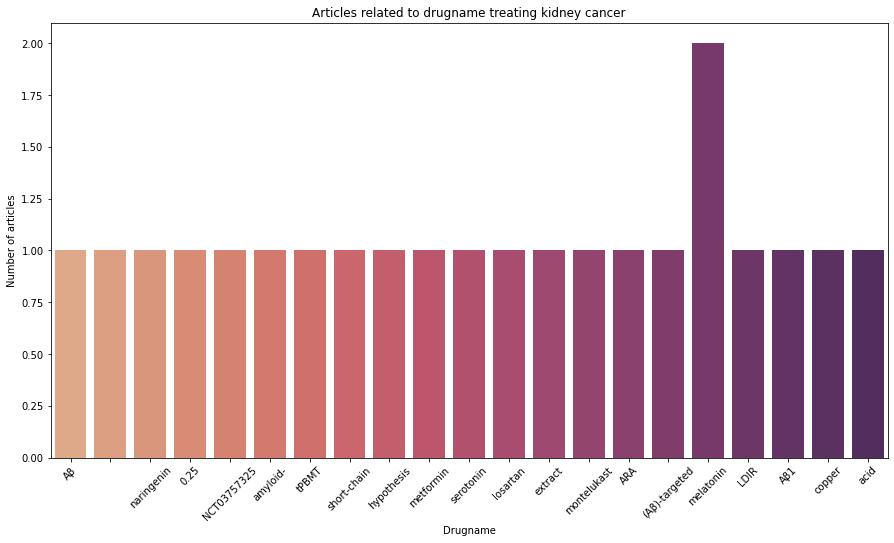

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize =(15,8))
a = sns.countplot(data=Treatment_mentioned, x='primary_drug', palette='flare')
plt.xticks(rotation=45)
a.set(xlabel='Drugname', ylabel='Number of articles', title='Articles related to drugname treating kidney cancer');


In [ ]:
drug_recommendation=Alzheimer_found['primary_drug'].value_counts().to_dict()


In [ ]:
drug_recommendation= {key:val for key, val in drug_recommendation.items() if val != 1}
drug_recommendation= {key:val for key, val in drug_recommendation.items() if val != 2}
del drug_recommendation["±"]
del drug_recommendation["("]
del drug_recommendation["-"]
del drug_recommendation["≥"]
del drug_recommendation['\n']
del drug_recommendation[',']
drug_recommendation

{'amyloid': 50,
 'aducanumab': 32,
 'Aβ': 31,
 'glucose': 17,
 'memantine': 15,
 'Tau': 14,
 'donepezil': 14,
 'beta': 14,
 'melatonin': 12,
 'vitamin': 11,
 'β': 11,
 '\xa0': 10,
 'acupuncture': 9,
 'p-tau181': 9,
 'COVID-19': 9,
 'amyloid-beta': 8,
 'cholesterol': 8,
 'acid': 7,
 'levetiracetam': 5,
 'PET': 5,
 'Aβ-PET': 4,
 'Aducanumab': 4,
 'DMT': 4,
 'Aß': 4,
 'copper': 4,
 'lithium': 4,
 'Aβ1': 4,
 'metformin': 4,
 'NfL': 4,
 'statins': 3,
 'tau-PET': 3,
 'amyloid-β': 3,
 'antiseizure': 3,
 'low-dose': 3,
 'resveratrol': 3,
 'amino': 3,
 'iron': 3,
 'olanzapine': 3,
 'curcumin': 3,
 'Wisconsin': 3,
 'Aβ42/40': 3,
 'iADRS': 3,
 'alcohol': 3,
 'solanezumab': 3,
 'Amyloid-β': 3,
 'de': 3,
 'Aβ42/Aβ40': 3,
 'AA': 3,
 'Aβ42': 3,
 'acetylcholine': 3,
 'galantamine': 3,
 'TNF-α': 3}

In [ ]:
final =pd.DataFrame.from_dict(drug_recommendation.items())

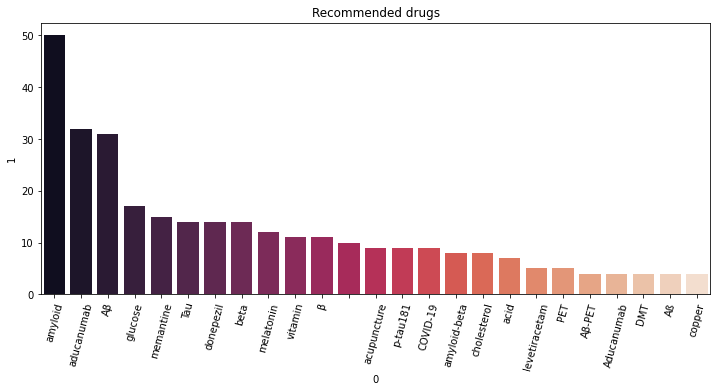

In [ ]:

plt.subplots(1,1,figsize=(12,5))

plt.xticks(rotation=75)
plt.ylabel('Count')
plt.title('Recommended drugs');

ax = sns.barplot(x= final[:25][0], y = final[:25][1] ,palette=("rocket"))
sns.set_context(context=None)

## The top drug recommendations for treatment are:
1. Aducanumab (FDA Approved)
2. Memantine
3. Donepezil
4. levetiracetam
5. Aducanumab

# references :
https://www.kaggle.com/code/salls123/simple-lstm-binary-classification

https://medium.com/mlearning-ai/the-classification-of-text-messages-using-lstm-bi-lstm-and-gru-f79b207f90ad

https://www.projectpro.io/recipes/explain-lstm-is-used-for-classification
